<a href="https://colab.research.google.com/github/bowie0713/DS-Project-1/blob/main/Three_Point_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Intro


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

import copy
import seaborn as sns

In [2]:
nba_df = pd.read_csv("NBA three point stats baseball ref.csv")
nba_df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2022-23,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2021-22,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2020-21,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2019-20,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2018-19,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


In [3]:
# nba_df['Season'] = ['2022','2021','2020','2019','2018','2017', '']
nba_df['Season'] = np.arange(start = 2023, stop = 1946, step = -1)
nba_df

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2023,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2022,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2021,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2020,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2019,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,73,1951,NBA,NaN,NaN,NaN,354,NaN,29.8,83.6,...,84.1,0.357,NaN,0.733,NaN,0.357,NaN,NaN,0.293,NaN
73,74,1950,NBA,NaN,NaN,NaN,561,NaN,28.2,83.1,...,80.0,0.340,NaN,0.714,NaN,0.340,NaN,NaN,0.284,NaN
74,75,1949,BAA,NaN,NaN,NaN,360,NaN,29.0,88.7,...,80.0,0.327,NaN,0.703,NaN,0.327,NaN,NaN,0.248,NaN
75,76,1948,BAA,NaN,NaN,NaN,192,NaN,27.2,96.0,...,72.7,0.284,NaN,0.675,NaN,0.284,NaN,NaN,0.190,NaN


# Since three point doesn't start until 1980, we'll drop the stats prior to the year 1980. 

In [4]:
nba_df = nba_df.drop(index = nba_df.index[2023-1979:])
nba_df.head()

,Rk,Season,Lg,Age,Ht,Wt,G,MP,FG,FGA,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,1,2023,NBA,26.1,6-Jun,216.0,1145,241.8,41.9,88.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,2,2022,NBA,26.1,6-Jun,215.0,1230,241.4,40.6,88.1,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,3,2021,NBA,26.1,6-Jun,217.0,1080,241.4,41.2,88.4,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,4,2020,NBA,26.1,6-Jun,218.0,1059,241.8,40.9,88.8,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,5,2019,NBA,26.3,6-Jun,219.0,1230,241.6,41.1,89.2,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


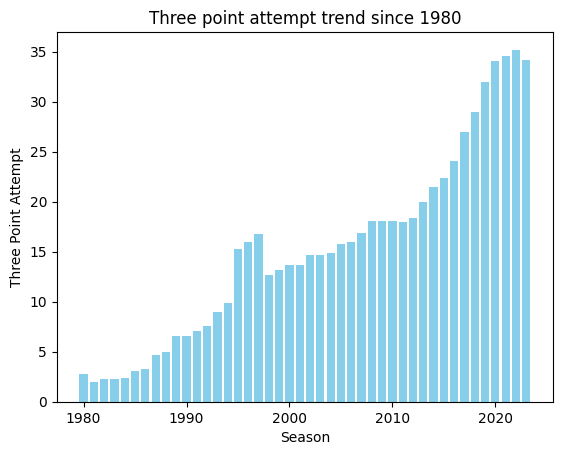

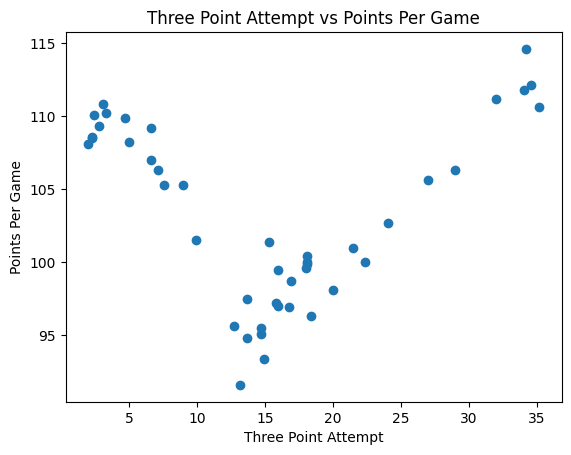

In [5]:
plt.bar(x = nba_df['Season'], height = nba_df['3PA'], color = 'skyblue')
plt.title('Three point attempt trend since 1980')
plt.xlabel('Season')
plt.ylabel('Three Point Attempt')
plt.show()

plt.scatter(x = nba_df['3PA'], y = nba_df['PTS'])
plt.title('Three Point Attempt vs Points Per Game')
plt.xlabel('Three Point Attempt')
plt.ylabel('Points Per Game')
plt.show()

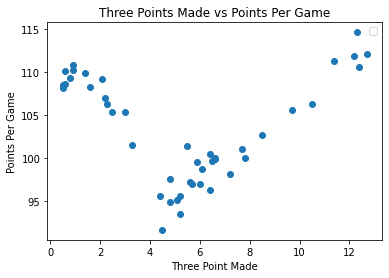

In [33]:
plt.scatter(x = nba_df['3P'], y = nba_df['PTS'])
plt.title('Three Points Made vs Points Per Game')
plt.xlabel('Three Point Made')
plt.ylabel('Points Per Game')
plt.legend()

In [6]:
nba_df = nba_df.drop(['Rk','Season','Lg','Age','Ht','Wt','G','MP' ], axis = 1) # Drop categorical data or data that are other wise useless by columns
nba_df.head()

,FG,FGA,3P,3PA,FT,FTA,ORB,DRB,TRB,AST,...,PTS,FG%,3P%,FT%,Pace,eFG%,TOV%,ORB%,FT/FGA,ORtg
0,41.9,88.2,12.3,34.2,18.5,23.6,10.4,33.0,43.4,25.2,...,114.6,0.475,0.361,0.782,99.1,0.545,12.5,24.0,0.210,114.8
1,40.6,88.1,12.4,35.2,16.9,21.9,10.3,34.1,44.5,24.6,...,110.6,0.461,0.354,0.775,98.2,0.532,12.3,23.2,0.192,112.0
2,41.2,88.4,12.7,34.6,17.0,21.8,9.8,34.5,44.3,24.8,...,112.1,0.466,0.367,0.778,99.2,0.538,12.4,22.2,0.192,112.3
3,40.9,88.8,12.2,34.1,17.9,23.1,10.1,34.8,44.8,24.4,...,111.8,0.460,0.358,0.773,100.3,0.529,12.8,22.5,0.201,110.6
4,41.1,89.2,11.4,32.0,17.7,23.1,10.3,34.8,45.2,24.6,...,111.2,0.461,0.355,0.766,100.0,0.524,12.4,22.9,0.198,110.4


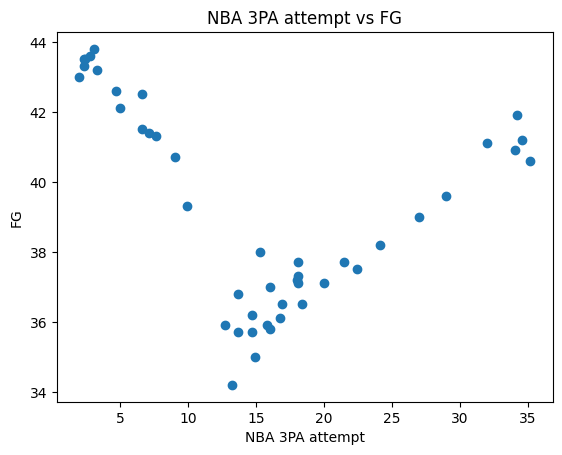

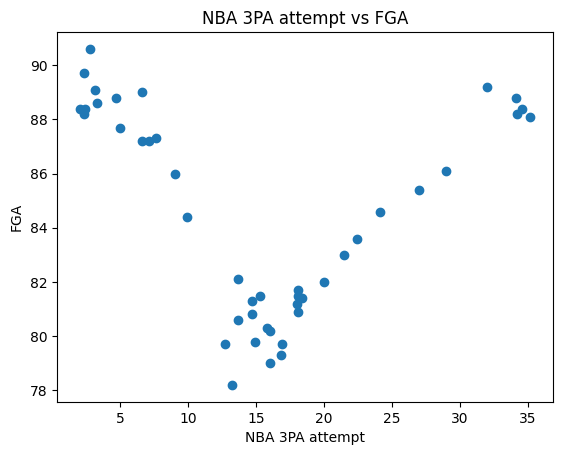

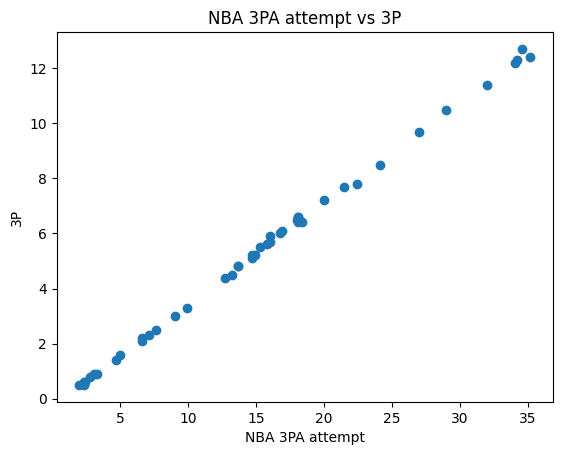

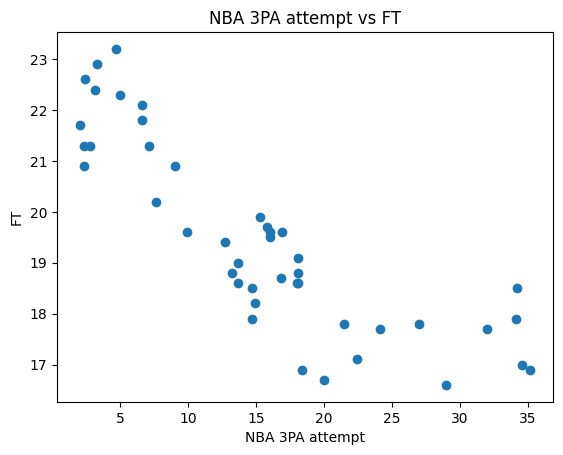

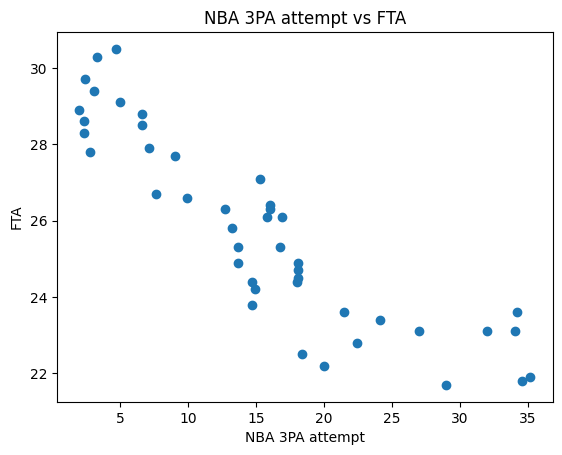

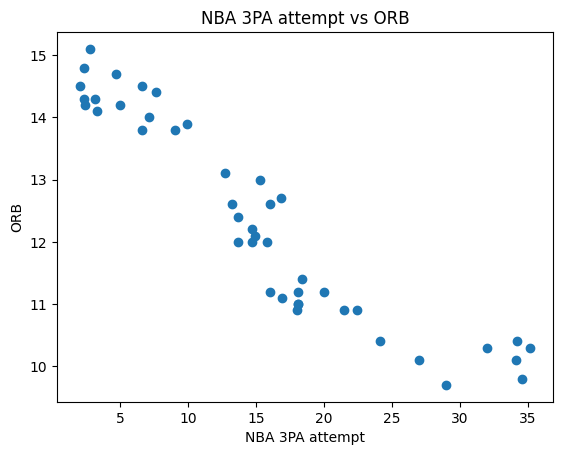

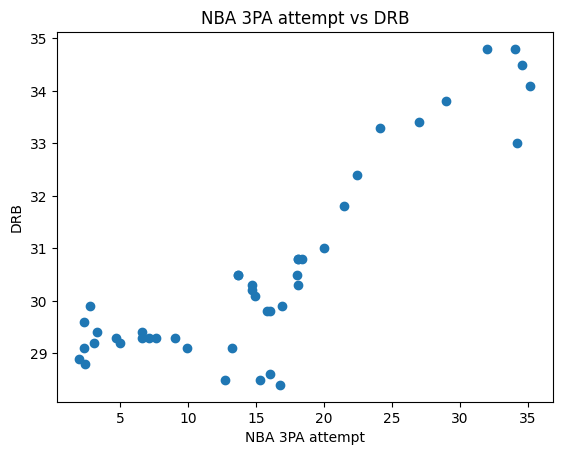

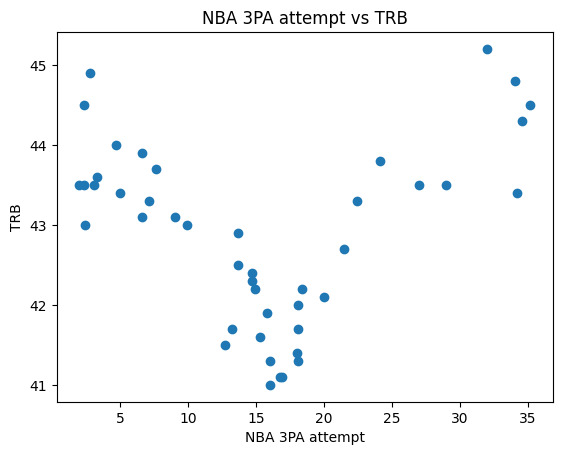

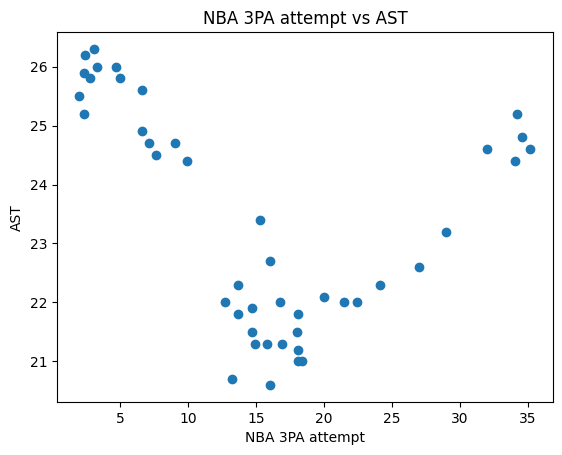

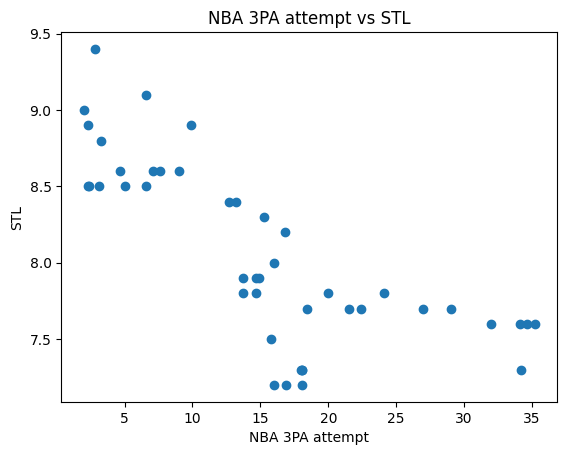

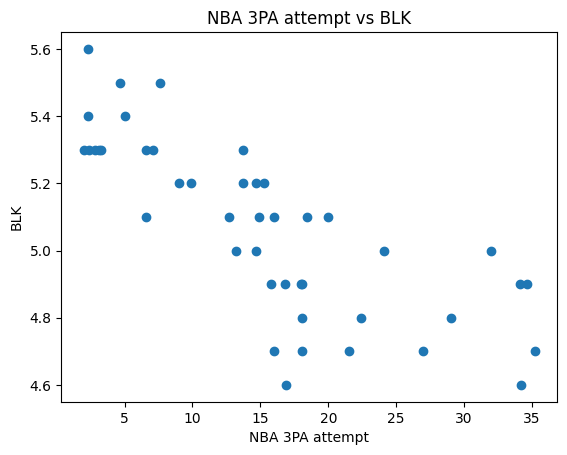

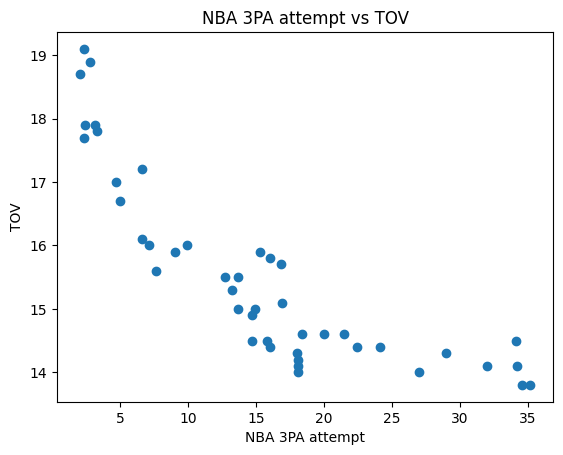

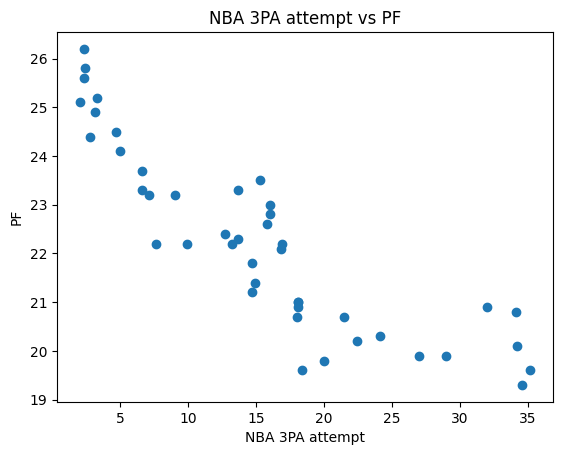

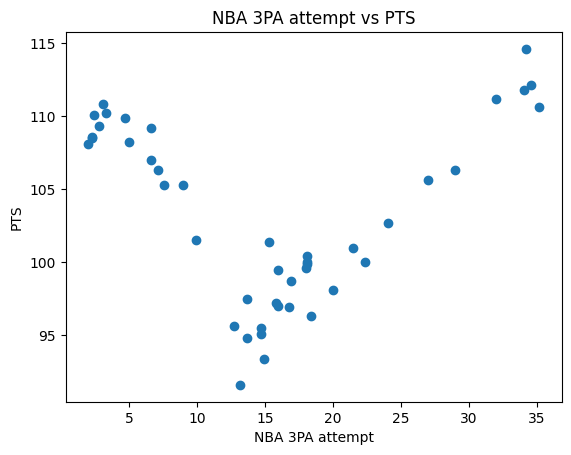

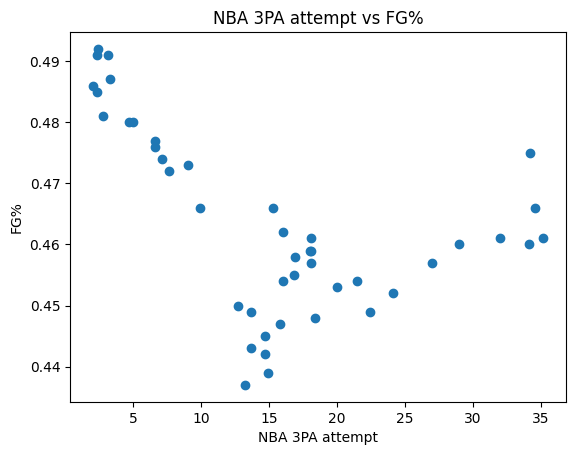

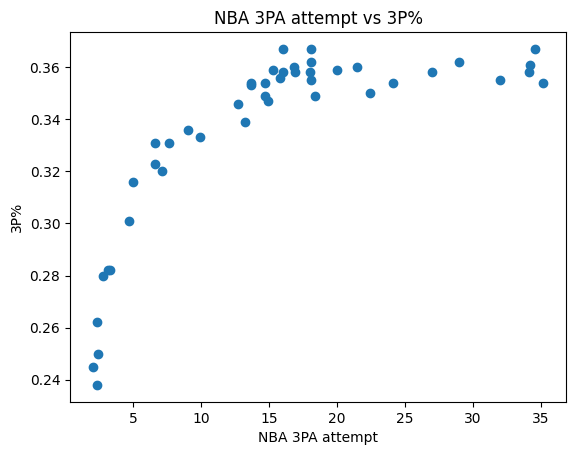

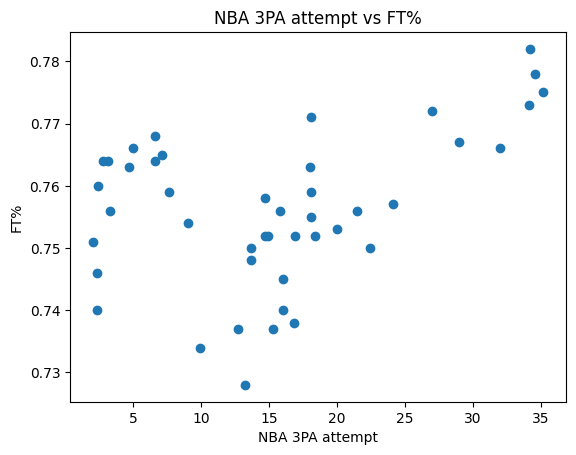

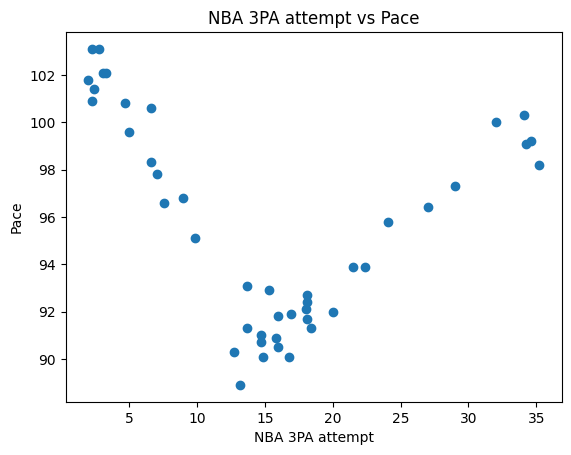

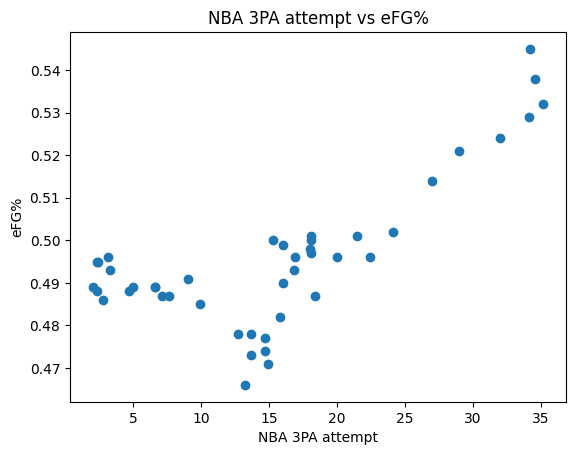

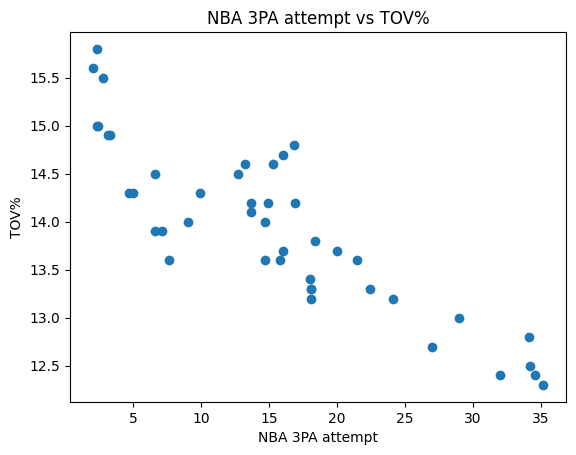

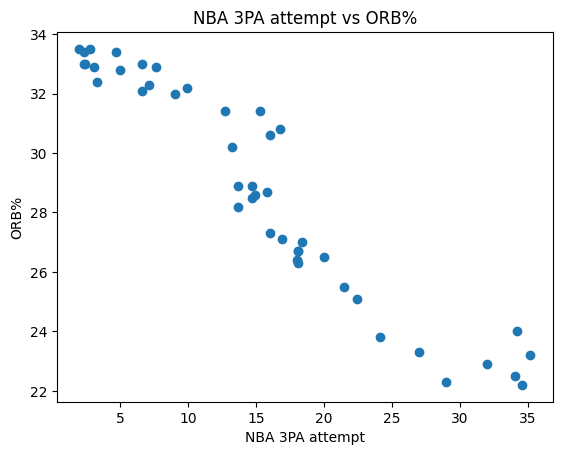

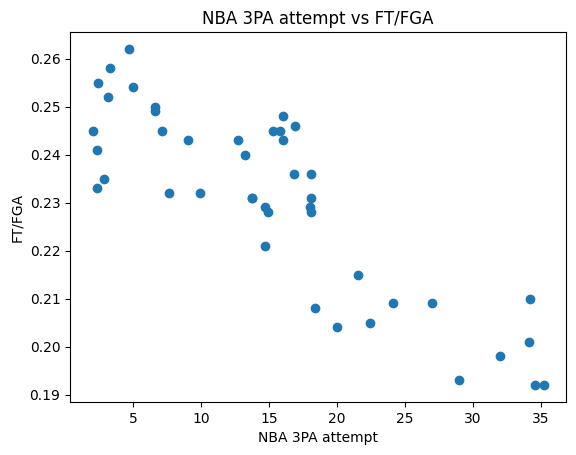

In [8]:
count = 0
for label in nba_df.columns[:-1]:
  if label == '3PA':
    count += 1
  else:
    plt.scatter(nba_df['3PA'], nba_df[label])
    plt.title('NBA 3PA attempt vs ' + label)
    plt.xlabel('NBA 3PA attempt')
    plt.ylabel(label)
    plt.show()

In [13]:
train, valid, test = np.split(nba_df.sample(frac = 1), [int(0.6*len(nba_df)), int(0.8*len(nba_df))])

In [14]:
def get_xy(dataframe, y_label, x_labels= None):
  dataframe = copy.deepcopy(dataframe)
  if not x_labels:
    x = dataframe[[c for c in dataframe.columns if c!= y_label]].values
  else:
    if len(x_labels) ==1:
      x = dataframe[x_labels[0]].values.reshape(-1,1)
    else:
      x = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1,1)
  data = np.hstack((x,y))

  return data, x, y

In [21]:
def get_xy(dataframe, x_label, y_labels= None):
  dataframe = copy.deepcopy(dataframe)
  if y_labels is None:
    y = dataframe[[c for c in dataframe.columns if c!= x_label]].values
  else:
    if len(y_labels) ==1:
      y = dataframe[y_labels[0]].values.reshape(-1,1)
    else:
      y = dataframe[y_labels].values

  x = dataframe[x_label].values.reshape(-1,1)
  data = np.hstack((x,y))

  return data, x, y

In [15]:
from sklearn.linear_model import LinearRegression

In [23]:
d, x_train_pts, y_train_pts = get_xy(train, x_label = '3PA', y_labels = ['PTS'])
d, x_val_pts, y_val_pts = get_xy(valid, x_label = '3PA', y_labels = ['PTS'])
d, x_test_pts, y_test_pts = get_xy(test, x_label = '3PA', y_labels = ['PTS'])

In [24]:
pts_3pa_reg = LinearRegression()
pts_3pa_reg.fit(x_train_pts, y_train_pts)

LinearRegression()

In [27]:
print(pts_3pa_reg.coef_)
print(pts_3pa_reg.intercept_)

[[0.16205655]]
[100.35466207]


In [28]:
pts_3pa_reg.score(x_test_pts, y_test_pts)

-0.13368919580961913

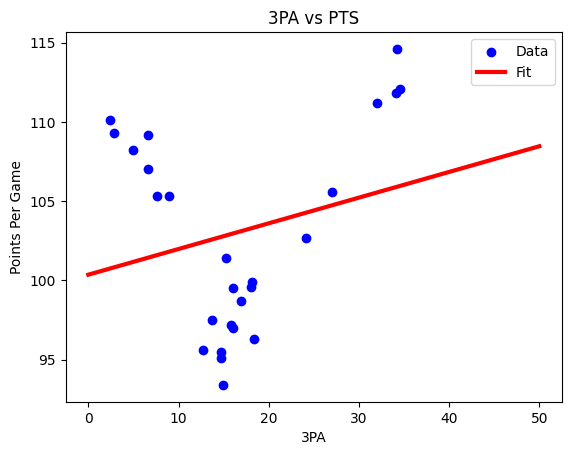

In [29]:
import tensorflow as tf
plt.scatter(x_train_pts, y_train_pts, label = 'Data',color = 'blue')
x = tf.linspace(0, 50, 100)
plt.plot(x, pts_3pa_reg.predict(np.array(x).reshape(-1,1)), label = "Fit", color = 'red', linewidth = 3)
plt.legend()
plt.title("3PA vs PTS")
plt.ylabel("Points Per Game")
plt.xlabel("3PA")
plt.show()